## Statistical Inference

The primary tools of statistical inference are confidence intervals and hypothesis tests.  In this notebook, we will show how to calculate values necessary for making the relevant calculations.  Again we will be working with the Ames, IA housing data.  


In [1]:
#Import the relevant libraries for the code below
import scipy.stats as st 

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

In [2]:
# read in the data to dataframe called ames
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace([' ?'],np.nan)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### For mean of a population

The focus of the Ames, IA data set is the prediction of _SalePrice_ so we will focus on that here.  

So we will assume we have a random sample from a population and we want to make some decision about the mean of the full population.  

We will first look at the distribution of _SalePrice_.

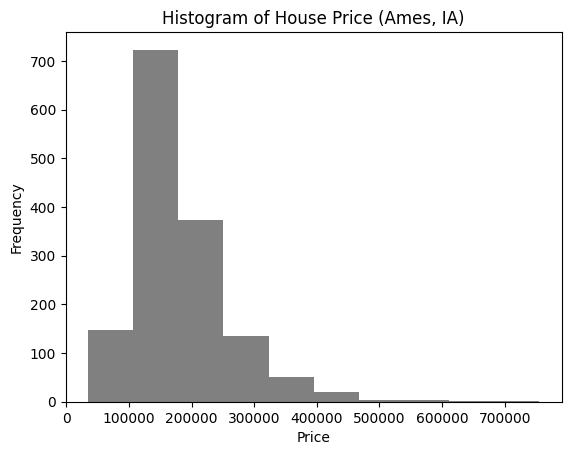

In [3]:
# make a green histogram
plt.hist(ames['SalePrice'], color="grey")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Price (Ames, IA)')
plt.show()

Next let's get some numeric summaries for this distribution.   

In [4]:
sale_price = ames['SalePrice']

print("Mean of Sale Price is ", np.round(np.mean(ames['SalePrice']),2))
print("Standard deviation of Sale Price is ", np.round(np.std(ames['SalePrice']),2))



Mean of Sale Price is  180921.2
Standard deviation of Sale Price is  79415.29


From the above output we can see that the mean sales price is $180921 with a standard deviation of about $79400.

So let's make a 95% confidence interval for the mean of all sales prices for houses in Ames, IA.  Below is the python code to make that interval.  Note we are using a one-sample t confidence interval.  

In [5]:
# create 95% confidence interval for population mean
st.t.interval(confidence=0.95, 
              df=len(sale_price)-1, 
              loc=np.mean(sale_price),  
              scale=st.sem(sale_price)) 

(np.float64(176842.84104108496), np.float64(184999.55073973694))

So we can be 95% confidence that the mean sales price of all houses sold in Ames, IA is between $176842 and $185000.   

### Discussion
What is the population here?  Would this interval be appropriate for the mean of all houses sold in Ames, IA in 2025?  Why or Why not?

#### Hypothesis test for a mean

The other methodology for statistical inference is the hypothesis test.  Suppose we wanted to know if the average sales price for a house in Ames, IA is significantly less than $190000.  We know the average price is \$180921 but could we claim that this is discernibly less than \$190000.  


Formally, the above translates to a hypothesis test of $H_0:\mu = 190000 $ vs. $H_0: \mu < 190000$ where $\mu$ is the mean price of all houses in Ames, IA.

How do we carry this test out in Python.  We'll use Python to calculate the p-value for us.

In [6]:
#import function for one-sample t test
from scipy.stats import ttest_1samp

# get test statistic
test_statistic, p_value = ttest_1samp(sale_price, 190000, alternative = "less")
print(p_value)

6.751964751015968e-06


Since the p-value is small ($6.75 x 10 ^ -6$), we can reject the null hypothesis that the mean of all sale prices for houses in Ames, IA is $190000 in favor of the alternative that the mean is discernibly less than \$190000.  

### Inference for proportions

We are next going to look at methods for statistical inference about a proportion.  Again we will have a confidence interval and a hypothesis test.  Our focus this time will be the feature _Fireplaces_ which is the number of fireplaces.  

In [7]:
# look at the first five values of the feature _CentralAir_
print(ames['Fireplaces'].head())
# create dummy variables (or one hot encoding or indicator variables) for Central Air
fireplaces= ames['Fireplaces']>0
# look at the first five values of this new feature which will have True/False as values
print(fireplaces.head())
# we will often want to have True values be represented as 1 and False values represented as 0's (zeroes)
# this is code to do that.
fireplaces = fireplaces*1
print(fireplaces.head())
# get the num of houses that do have central air
print(np.sum(fireplaces, axis=0))
# get the total number of houses
print(len(fireplaces))

0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64
0    False
1     True
2     True
3     True
4     True
Name: Fireplaces, dtype: bool
0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64
770
1460


So there were 770 houses with a fireplace out of 1460 houses in these data.  That is, 52.7%.   We will first make a confidence interval.

In [8]:
# import an additional 
from scipy.stats import binomtest


result = binomtest(770, n=1460)
result.proportion_ci()
# Calculate confidence interval


ConfidenceInterval(low=0.5014126728980545, high=0.553271418420122)

Thus our 95% confidence interval is between 0.501 and 0.553.  So we are 95% confident that the proportion of all houses sold in Ames, Iowa that have a fireplace is between 50.1% and 55.3%.  

To illustrate how to do a hypothesis test for a single proportion we will look at the percent of houses that have wooden decks.  To get at this we will use the feature _WoodDeckSF_ which is the square footage of wooden decks for a given house.  If the square footage is more than 0, we'll assume that the house has a wood deck.

In [9]:
# look at the first five values of the feature _WoodDeckSF_
print(ames['WoodDeckSF'].head())
decks= ames['WoodDeckSF']>0
# we will often want to have True values be represented as 1 and False values represented as 0's (zeroes)
# this is code to do that.
decks = decks*1
# get the num of houses that do have a wooden deck
print(np.sum(decks, axis=0))
# get the total number of houses
print(len(decks))

0      0
1    298
2      0
3      0
4    192
Name: WoodDeckSF, dtype: int64
699
1460


So 699 of 1460 or 47.9% of houses for sale in Ames, IA had a wooden deck.  Let's test whether that is discernibly less than 50%.  Formally, that means that we are testing  $H_0: p = 0.50$ vs $H_a: p<0.50$ where $p$ is the proportion of the population of houses that have a wooden deck.

In [10]:
# code for hypothesis test for proportion
result = binomtest(699, n=1460, p=0.5, alternative='less')
print(np.round(result.pvalue,5))

0.05518


The p-value is $0.0552$ which is relatively large and so we fail to reject the null hypothesis that the proportion of all houses for sale in Ames, IA is 50%.  That is, our observed proportion, 47.9%, was not statistically distinguishable from 50%.  

### Tasks

1. Create a 99% confidence interval for the mean square footage of garages, *GarageArea*, for houses for sale in Ames, IA.  Interpret the interval that you made.

2. Formally test whether or not the mean _LotArea_ is more than 10000 square feet.  Clearly state and justify your conclusions.

3. Create and interpret a 95% confidence interval for the proportion of houses that are two stories (ames['HouseStyle']=="2Story").

4. Test formally if the proportion of garages that are attached to a house (_GarageType_=="Attchd") is more than 55%.  Clearly state and justify your conclusions.